[ 0  1  2  3  4  5  6  7  8  9 10]
[None 1 0.5 0.3333333333333333 0.25 0.2 0.16666666666666666
 0.14285714285714285 0.125 0.1111111111111111 0.1]


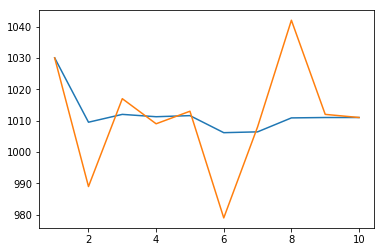

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# A, Z, K, prior_estimate_x, estimate_x = None, None, None, None, None

'''
用于评估黄金的重量
Z = [1030 989 1017 1009 1013 979 1008 1042 1012 1011]
K = 1/n
initial guess 1000
'''

Z = np.array([None, 1030, 989, 1017, 1009, 1013, 979, 1008, 1042, 1012, 1011])
A = 1
K = np.array([None, 1, 1 / 2, 1 / 3, 1 / 4, 1 / 5, 1 / 6, 1 / 7, 1 / 8, 1 / 9, 1 / 10])
T = np.arange(0, 11)

estimate_x = np.zeros(11)
prior_estimate_x = np.zeros(11)

estimate_x[0] = 1000

print(T)
print(K)
# 输入一个z
for t in T[1:]:
    # 预测
    prior_estimate_x[t] = estimate_x[t - 1] * A
    # 更新
    estimate_x[t] = prior_estimate_x[t] + K[t] * (Z[t] - prior_estimate_x[t])

plt.figure()

plt.plot(T[1:], estimate_x[1:])
plt.plot(T[1:], Z[1:])

[ 0  1  2  3  4  5  6  7  8  9 10]


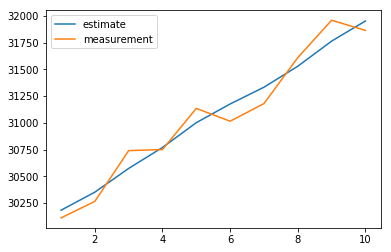

In [2]:
'''
Now, it is time to examine a dynamic system that changes its state over the time. In this example, 
we are going to track the constant velocity aircraft in one dimension using the α-β filter.

α=0.2
β=0.1

The initial conditions for the time n=0 are given:

x^0,0=30000m
x˙^0,0=40m/s



'''
a = 0.2
b = 0.1
dt = 5

Z = np.array([None, 30110, 30265, 30740, 30750, 31135, 31015, 31180, 31610, 31960, 31865])

estimate_x = np.zeros((2, 11))
prior_estimate_x = np.zeros((2, 11))
A = np.array([[1, 5], [0, 1]])

estimate_x[:, 0] = [30000, 40]
T = np.arange(0, 11)
print(T)
# estimate_x
for t in T[1:]:
    # 预测
    prior_estimate_x[:, t] = np.dot(A, estimate_x[:, t - 1])
    # 更新
    # a = np.dot(np.array([[1, -a], [-b / dt, 1]]), prior_estimate_x[:, t])
    # print(a)
    estimate_x[:, t] = np.dot(np.array([[1 - a, 0], [-b / dt, 1]]), prior_estimate_x[:, t]) + [a * Z[t], b * Z[t] / dt]

plt.figure()
plt.plot(T[1:], estimate_x[0, 1:],label='estimate')
plt.plot(T[1:],Z[1:],label='measurement')
plt.legend(loc='best')

![jupyter](./kn.png)


![jupyter](./kn2.png)

![jupyter](./pn.png)

In [3]:
'''
至此我们有了两个公式, 
The state update equations.
The dynamic model equations.

然后我们引入 estimate error 和 measurement error
第三个公式是
 Kalman Gain Equation  Kn是测量权重
 第四个公式是
 Covariance Update Equation
 
 第五个公式是, covariance的预测变化公式
 Covariance Extrapolation Equation
 在第一个例子中, 系统的dynamic models 是不变的, pn+1 = p
'''


'\n至此我们有了两个公式, \nThe state update equations.\nThe dynamic model equations.\n\n然后我们引入 estimate error 和 measurement error\n第三个公式是\n Kalman Gain Equation\n 第四个公式是\n Covariance Update Equation\n \n 第五个公式是, covariance的预测变化公式\n Covariance Extrapolation Equation\n 在第一个例子中, 系统的dynamic models 是不变的, pn+1 = p\n'

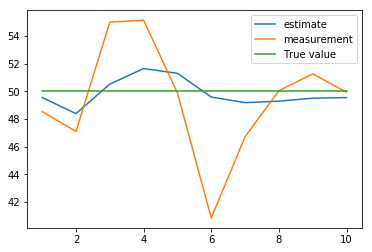

In [4]:
# building height
'''
The true building height is 50 meters.
The altimeter measurement error (standard deviation) is 5 meters.
The set of ten measurements is: 48.54m, 47.11m, 55.01m, 55.15m, 49.89m, 40.85m, 46.72m, 50.05m, 51.27m, 49.95m.
'''
estimate_x = np.zeros(11)
prior_estimate_x = np.zeros(11)
estimate_x[0] = 60
True_value = np.array([None, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50])
P = np.zeros(11)
K = np.zeros(11)
Z = np.array([None, 48.54, 47.11, 55.01, 55.15, 49.89, 40.85, 46.72, 50.05, 51.27, 49.95])
P[0] = 255
T = np.arange(0, 11)
R = np.array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25])
for t in T[1:]:
    prior_estimate_x[t] = estimate_x[t - 1]
    P[t] = P[t - 1]
    
    K[t] = P[t] / (P[t] + R[t])
    
    estimate_x[t] = prior_estimate_x[t] + K[t] * (Z[t] - prior_estimate_x[t])
    P[t] = (1 - K[t]) * P[t]

plt.figure()
plt.plot(T[1:], estimate_x[1:], label='estimate')
plt.plot(T[1:], Z[1:], label='measurement')
plt.plot(T[1:], True_value[1:], label='True value')
plt.legend()

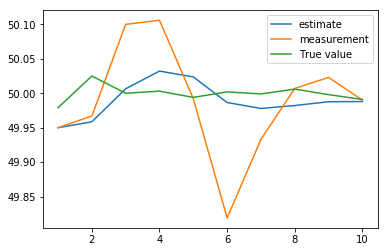

In [5]:
# 我们评估房子的高度的时候, 过程噪声为0 , 因为房子的高度不会变化. 系统的噪声为 q
'''
The Covariance Extrapolation Equation shall include the Process Noise Variance.
'''
# We would like to estimate the temperature of the liquid in a tank.
'''
测量液体的温度, 液体的真实温度也是在变化的, 
49.979oC, 50.025oC, 50oC, 50.003oC, 49.994oC, 50.002oC, 49.999oC, 50.006oC, 49.998oC, and 49.991oC
'''
estimate_x = np.zeros(11)
prior_estimate_x = np.zeros(11)
estimate_x[0] = 10
True_value = np.array([None, 49.979, 50.025, 50, 50.003, 49.994, 50.002, 49.999, 50.006, 49.998, 49.991])
P = np.zeros(11)
K = np.zeros(11)
Z = np.array([None, 49.95, 49.967, 50.1, 50.106, 49.992, 49.819, 49.933, 50.007, 50.023, 49.99])
P[0] = 10000
T = np.arange(0, 11)
Q = 0.0001
R = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
for t in T[1:]:
    prior_estimate_x[t] = estimate_x[t - 1]
    P[t] = P[t - 1] + Q
    
    K[t] = P[t] / (P[t] + R[t])
    
    estimate_x[t] = prior_estimate_x[t] + K[t] * (Z[t] - prior_estimate_x[t])
    P[t] = (1 - K[t]) * P[t]

plt.figure()
plt.plot(T[1:], estimate_x[1:], label='estimate')
plt.plot(T[1:], Z[1:], label='measurement')
plt.plot(T[1:], True_value[1:], label='True value')
plt.legend()

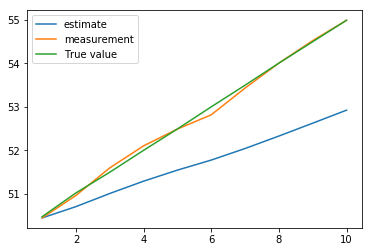

In [9]:
'''
下面我们来验证kalman filter在建立的模型不可靠的情况下的失效
例子中是一个持续加热的模型, 但是我们将它用恒温模型来对待

in this example we are going to estimate the temperature of the liquid in the tank. 
The system dynamics is not constant, the liquid is heating at the rate of 0.1oC every second

这个是我们觉得自己的模型的可信度
We think that we have an accurate model, thus we set the process noise variance (q) to 0.0001.
'''
dt = 5
estimate_x = np.zeros(11)
prior_estimate_x = np.zeros(11)
estimate_x[0] = 10
True_value = np.array([None, 50.479, 51.025, 51.5, 52.003, 52.494, 53.002, 53.499, 54.006, 54.498, 54.991])
P = np.zeros(11)
K = np.zeros(11)
Z = np.array([None, 50.45, 50.967, 51.6, 52.106, 52.492, 52.819, 53.433, 54.007, 54.523, 54.99])
P[0] = 10000
T = np.arange(0, 11)
# 这里我们自信地觉得我们的模型是正确的, 于是将process noise 设置为很小
Q = 0.0001
R = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
for t in T[1:]:
    prior_estimate_x[t] = estimate_x[t - 1]
    P[t] = P[t - 1] + Q
    
    K[t] = P[t] / (P[t] + R[t])
    
    estimate_x[t] = prior_estimate_x[t] + K[t] * (Z[t] - prior_estimate_x[t])
    P[t] = (1 - K[t]) * P[t]

plt.figure()
plt.plot(T[1:], estimate_x[1:], label='estimate')
plt.plot(T[1:], Z[1:], label='measurement')
plt.plot(T[1:], True_value[1:], label='True value')
plt.legend()

'''
多维度的filer
'''
首先是state extrapolation equation
![jupyter](./matrix_se.png)


In [ ]:
'''
一个飞机以恒定的加速度运动的例子
'''
estimate_x = np.zeros((6,11))
U = 
prior_estimate_x = np.zeros(11)
estimate_x[0] = 10
True_value = np.array([None, 50.479, 51.025, 51.5, 52.003, 52.494, 53.002, 53.499, 54.006, 54.498, 54.991])
P = np.zeros(11)
K = np.zeros(11)
Z = np.array([None, 50.45, 50.967, 51.6, 52.106, 52.492, 52.819, 53.433, 54.007, 54.523, 54.99])
P[0] = 10000
T = np.arange(0, 11)
# 这里我们自信地觉得我们的模型是正确的, 于是将process noise 设置为很小
Q = 0.0001
R = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
for t in T[1:]:
    prior_estimate_x[t] = estimate_x[t - 1]
    P[t] = P[t - 1] + Q
    
    K[t] = P[t] / (P[t] + R[t])
    
    estimate_x[t] = prior_estimate_x[t] + K[t] * (Z[t] - prior_estimate_x[t])
    P[t] = (1 - K[t]) * P[t]

plt.figure()
plt.plot(T[1:], estimate_x[1:], label='estimate')
plt.plot(T[1:], Z[1:], label='measurement')
plt.plot(T[1:], True_value[1:], label='True value')
plt.legend()